# Librerias


In [28]:
#!pip install sodapy


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [31]:
import pandas as pd
from datetime import datetime
import numpy as np
from sodapy import Socrata
import matplotlib.pyplot as plt

import seaborn as sns



pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Lectura


In [2]:
inicio = datetime.now()
print(f"Hora inicial: {inicio.strftime('%Y-%m-%d %H:%M:%S')}")

client = Socrata("www.datos.gov.co", None, timeout=60)
DATASET = "kgxf-xxbe"

limit = 50_000
offset = 0
frames = []

while True:
    results = client.get(DATASET, limit=limit, offset=offset)
    if not results:
        break
    frames.append(pd.DataFrame.from_records(results))
    offset += limit

saber11_df = pd.concat(frames, ignore_index=True)

# ----------------------------------------
fin = datetime.now()
print(f"Hora final:   {fin.strftime('%Y-%m-%d %H:%M:%S')}")
print(f"Duración total: {fin - inicio}")
print(f"Filas descargadas: {saber11_df.shape[0]:,}")
# ----------------------------------------


Hora inicial: 2025-10-25 16:58:32
Hora final:   2025-10-25 17:18:24
Duración total: 0:19:51.896498
Filas descargadas: 7,109,704


El conjunto de datos corresponde a los Resultados únicos de la prueba Saber 11, publicados por el ICFES y disponibles en el portal Datos Abiertos de Colombia.
Contiene información detallada sobre los estudiantes que presentaron la prueba, las características del colegio y variables familiares y socioeconómicas asociadas al desempeño académico.


La versión empleada fue obtenida mediante la API pública de Socrata, lo que permitió descargar el total de registros (7.109.704 observaciones)

En caso de que la información extraida por la API no este disponible , disponemos de la siguiente celda para poder cargar los datos directamente de un archivo ".parquet".

- para poder hacer uso de esta alternativa debemos descomentar la linea de codigo y ejecutar la celda 

In [2]:
#saber11_df = pd.read_parquet("saber11_completo.parquet")
#saber11_df.shape[0]

7109704

Para poder identificar el tipo de dato de las columnas y si tienen alguna novedad que debamos tener en cuenta para tratar los datos correctamente  utilizaremos el comando ".info()" para ver el tipo de dato de cada campo .

- Encontramos que todos los datos cargados del dataframe son de tipo "object" 
- Por lo que mas adelante se tendra que modificar el tipo de dato en algunos campos para poder tratarlos correctamente

In [3]:
saber11_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109704 entries, 0 to 7109703
Data columns (total 51 columns):
 #   Column                         Dtype 
---  ------                         ----- 
 0   periodo                        object
 1   estu_tipodocumento             object
 2   estu_consecutivo               object
 3   cole_area_ubicacion            object
 4   cole_bilingue                  object
 5   cole_calendario                object
 6   cole_caracter                  object
 7   cole_cod_dane_establecimiento  object
 8   cole_cod_dane_sede             object
 9   cole_cod_depto_ubicacion       object
 10  cole_cod_mcpio_ubicacion       object
 11  cole_codigo_icfes              object
 12  cole_depto_ubicacion           object
 13  cole_genero                    object
 14  cole_jornada                   object
 15  cole_mcpio_ubicacion           object
 16  cole_naturaleza                object
 17  cole_nombre_establecimiento    object
 18  cole_nombre_sede      

El dataset cuenta con 51 columnas, que abarcan:

Identificación y datos personales del estudiante: tipo de documento, género, fecha de nacimiento, departamento y municipio de residencia.
Información del establecimiento educativo: nombre, código DANE, ubicación geográfica, calendario, carácter, jornada y naturaleza del colegio.

Contexto familiar: nivel educativo de los padres, número de personas en el hogar y acceso a bienes como computador, internet o lavadora.

Resultados académicos: puntajes por área (lectura crítica, matemáticas, ciencias naturales, sociales e inglés) y el puntaje global.

In [4]:
saber11_df.head(4)

,periodo,estu_tipodocumento,estu_consecutivo,cole_area_ubicacion,cole_bilingue,cole_calendario,cole_caracter,cole_cod_dane_establecimiento,cole_cod_dane_sede,cole_cod_depto_ubicacion,cole_cod_mcpio_ubicacion,cole_codigo_icfes,cole_depto_ubicacion,cole_genero,cole_jornada,cole_mcpio_ubicacion,cole_naturaleza,cole_nombre_establecimiento,cole_nombre_sede,cole_sede_principal,estu_cod_depto_presentacion,estu_cod_mcpio_presentacion,estu_cod_reside_depto,estu_cod_reside_mcpio,estu_depto_presentacion,estu_depto_reside,estu_estadoinvestigacion,estu_estudiante,estu_fechanacimiento,estu_genero,estu_mcpio_presentacion,estu_mcpio_reside,estu_nacionalidad,estu_pais_reside,estu_privado_libertad,fami_cuartoshogar,fami_educacionmadre,fami_educacionpadre,fami_estratovivienda,fami_personashogar,fami_tieneautomovil,fami_tienecomputador,fami_tieneinternet,fami_tienelavadora,desemp_ingles,punt_ingles,punt_matematicas,punt_sociales_ciudadanas,punt_c_naturales,punt_lectura_critica,punt_global
0,20131,CR,SB11201310000414,URBANO,N,B,ACADÉMICO,311848000812,311848000812,11,11001,022574,BOGOTA,FEMENINO,COMPLETA,BOGOTÁ D.C.,NO OFICIAL,GIMN FEMENINO,GIMN FEMENINO,S,11,11001,11,11001,BOGOTÁ,BOGOTÁ,PUBLICAR,ESTUDIANTE,08/08/1994,F,BOGOTÁ D.C.,BOGOTÁ D.C.,COLOMBIA,COLOMBIA,N,Cuatro,Educación profesional completa,Educación profesional completa,Estrato 6,Cuatro,Si,Si,Si,Si,B+,94,88,None,None,None,None
1,20194,TI,SB11201940464873,RURAL,N,A,TÉCNICO/ACADÉMICO,141016000305,241016000342,41,41016,194878,HUILA,MIXTO,COMPLETA,AIPE,OFICIAL,INSTITUCION EDUCATIVA JESUS MARIA AGUIRRE CHARRY,DINDAL,N,41,41016,41,41016,HUILA,HUILA,PUBLICAR,ESTUDIANTE,15/02/2003,F,AIPE,AIPE,COLOMBIA,COLOMBIA,N,Dos,Postgrado,Primaria completa,Estrato 2,1 a 2,No,Si,Si,Si,B1,71,66,70,65,69,339
2,20194,TI,SB11201940464873,RURAL,N,A,TÉCNICO/ACADÉMICO,141016000305,241016000342,41,41016,194878,HUILA,MIXTO,COMPLETA,AIPE,OFICIAL,INSTITUCION EDUCATIVA JESUS MARIA AGUIRRE CHARRY,DINDAL,N,41,41016,41,41016,HUILA,HUILA,PUBLICAR,ESTUDIANTE,15/02/2003,F,AIPE,AIPE,COLOMBIA,COLOMBIA,N,Dos,Postgrado,Primaria completa,Estrato 2,1 a 2,No,Si,Si,Si,B1,71,66,70,65,69,339
3,20122,TI,SB11201220204399,URBANO,N,A,TÉCNICO/ACADÉMICO,163130000718,163130000718,63,63130,013029,QUINDIO,MIXTO,MAÑANA,CALARCÁ,OFICIAL,INSTITUCION EDUCATIVA ANTONIO NARIÑO,ANTONIO NARIÑO,S,63,63130,63,63130,QUINDIO,QUINDIO,PUBLICAR,ESTUDIANTE,20/05/1996,F,CALARCÁ,CALARCÁ,COLOMBIA,COLOMBIA,N,Dos,Secundaria (Bachillerato) incompleta,No sabe,Estrato 1,Cuatro,No,Si,Si,No,A1,48,45,None,None,None,None


vista preliminar del dataframe para poder ver con que estructura empezaremos a trabajar 

In [8]:
def porcentaje_faltantes(df):
    faltantes = df.isnull().sum()
    porcentaje_faltantes = (faltantes / len(df)) * 100
    df_faltantes = pd.DataFrame({'Datos Faltantes': faltantes, 'Porcentaje': porcentaje_faltantes})
    df_faltantes = df_faltantes[df_faltantes['Datos Faltantes'] > 0]
    return df_faltantes

df_faltantes = porcentaje_faltantes(saber11_df)
df_faltantes

,Datos Faltantes,Porcentaje
estu_tipodocumento,1,0.000014
cole_area_ubicacion,3031,0.042632
cole_bilingue,916870,12.896036
cole_calendario,1536,0.021604
cole_caracter,110212,1.550163
cole_cod_dane_establecimiento,3377,0.047498
cole_cod_dane_sede,110,0.001547
cole_cod_depto_ubicacion,23,0.000324
cole_cod_mcpio_ubicacion,23,0.000324
cole_codigo_icfes,23733,0.333811


la mayoría de las variables presentan una completitud superior al 95 %, lo que indica una buena calidad general del conjunto de datos.
Los valores faltantes más relevantes se concentran en:

cole_bilingue con un 12,89 % de registros vacíos.
Variables familiares como fami_educacionmadre, fami_educacionpadre, fami_estratovivienda y fami_tieneinternet, con porcentajes entre 2 % y 3 %.

Las variables de resultados punt_sociales_ciudadanas, punt_c_naturales, punt_lectura_critica y punt_global, con aproximadamente 36,7 % de valores faltantes, lo que sugiere que una parte importante de los registros no cuenta con calificación completa.

In [10]:
saber11_df.duplicated(subset='estu_consecutivo').sum()


1388971

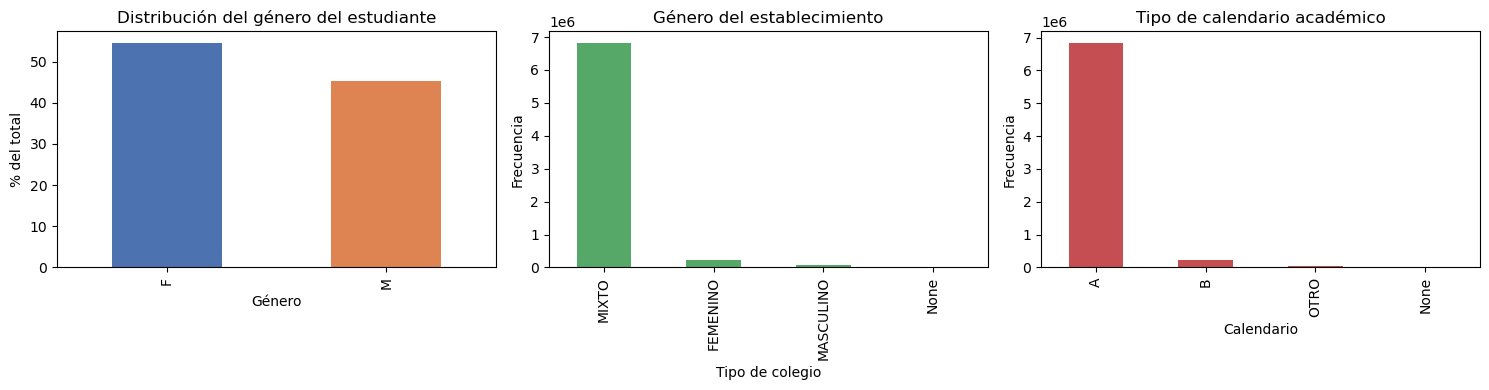

In [15]:
plt.figure(figsize=(15,4))

#  Género del estudiante
plt.subplot(1,3,1)
saber11_df['estu_genero'].value_counts(normalize=True).sort_values(ascending=False).mul(100).plot(
    kind='bar', color=['#4C72B0','#DD8452'])
plt.title('Distribución del género del estudiante')
plt.ylabel('% del total')
plt.xlabel('Género')

# Género del colegio
plt.subplot(1,3,2)
saber11_df['cole_genero'].value_counts(dropna=False).plot(
    kind='bar', color='#55A868')
plt.title('Género del establecimiento')
plt.ylabel('Frecuencia')
plt.xlabel('Tipo de colegio')

# Calendario escolar
plt.subplot(1,3,3)
saber11_df['cole_calendario'].value_counts(dropna=False).plot(
    kind='bar', color='#C44E52')
plt.title('Tipo de calendario académico')
plt.ylabel('Frecuencia')
plt.xlabel('Calendario')

plt.tight_layout()
plt.show()



En la distribución por género del estudiante, se observa una ligera mayoría de mujeres, que representan algo más del 50 % de la muestra. Esto refleja una participación equilibrada entre ambos géneros en la prueba Saber 11, sin diferencias marcadas en la cobertura.

En cuanto al género del establecimiento educativo, la gran mayoría de los estudiantes proviene de colegios mixtos, mientras que los establecimientos exclusivamente femeninos o masculinos son minoritarios. Este patrón es coherente con la tendencia nacional hacia la educación mixta.

Respecto al tipo de calendario académico, predomina el calendario A, que agrupa a la mayoría de instituciones oficiales del país. El calendario B tiene una presencia reducida, asociada principalmente a colegios privados bilingües o de orientación internacional.


## Analisis sociodemografico

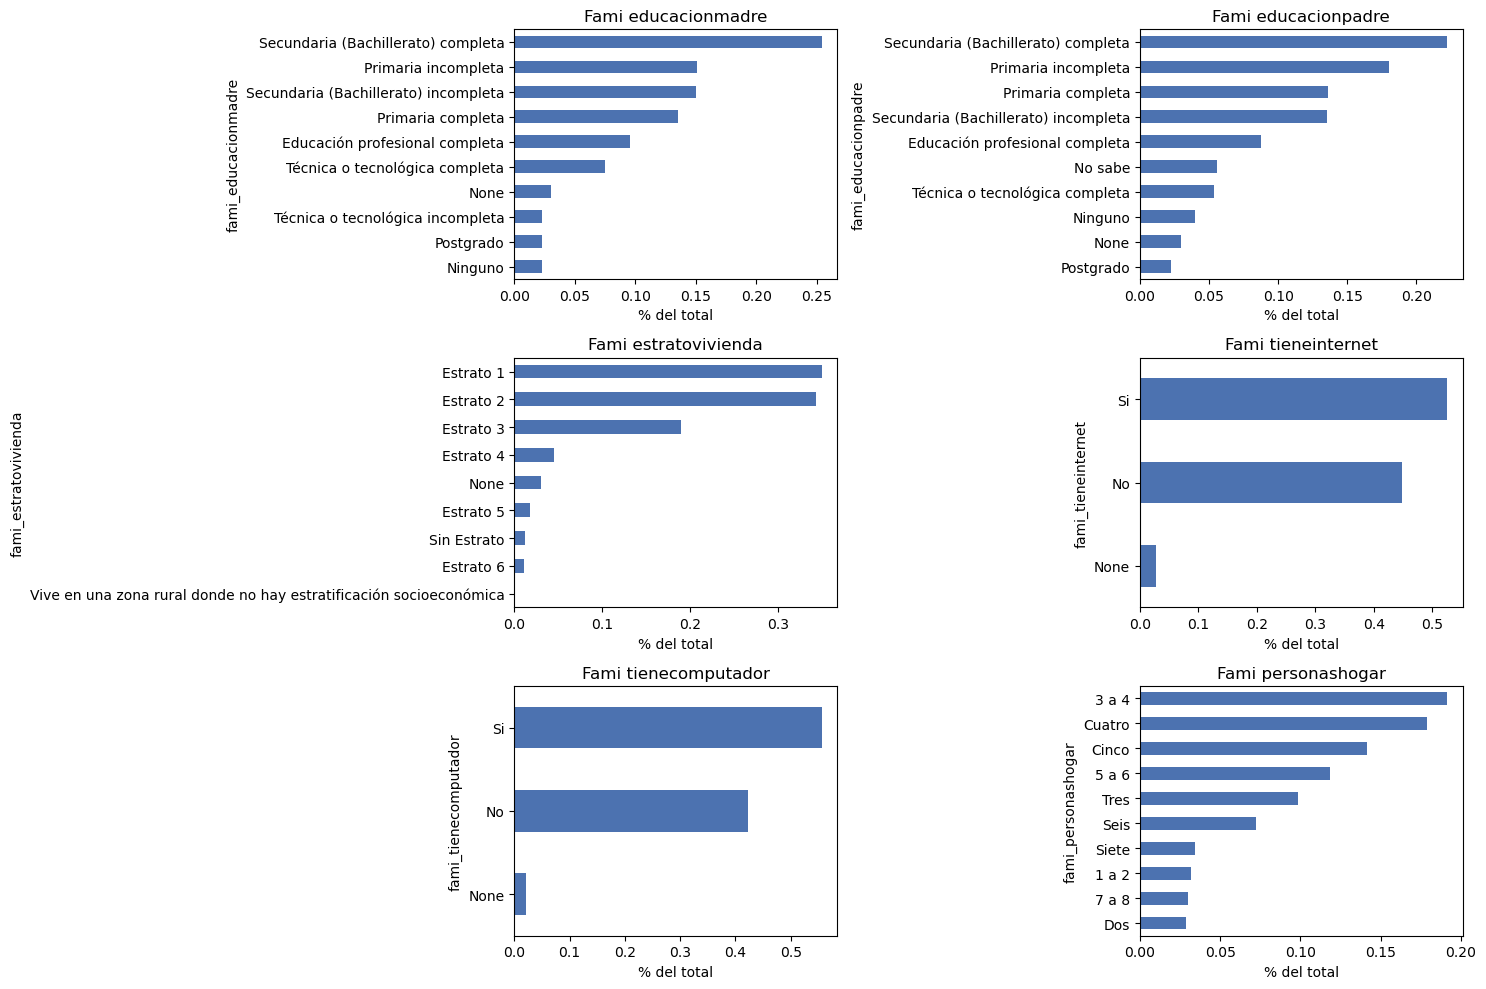

In [24]:
cols = [
    "fami_educacionmadre",
    "fami_educacionpadre",
    "fami_estratovivienda",
    "fami_tieneinternet",
    "fami_tienecomputador",
    "fami_personashogar"
]

plt.figure(figsize=(15,10))
for i, col in enumerate(cols, 1):
    plt.subplot(3,2,i)
    saber11_df[col].value_counts(normalize=True, dropna=False).head(10).sort_values(ascending=True).plot(
        kind='barh', color='#4C72B0')
    plt.title(col.replace("_"," ").capitalize())
    plt.xlabel('% del total')
plt.tight_layout()
plt.show()


En el entorno familiar se observa que la mayoría de los padres y madres alcanzaron como máximo la educación secundaria completa, mientras que una proporción menor logró niveles técnicos, tecnológicos o profesionales. Los porcentajes de educación universitaria y posgrado son marginales, lo que evidencia un nivel educativo medio-bajo en los hogares de los estudiantes.

Respecto a la condición socioeconómica, los estratos 1, 2 y 3 concentran la mayor parte de la población, representando juntos más del 80 %. Esto confirma que la mayoría de los examinados pertenecen a hogares de ingresos medios o bajos.

En cuanto al acceso a recursos tecnológicos, aproximadamente la mitad de los estudiantes reporta tener internet y computador en el hogar, lo que sugiere una brecha digital importante que puede incidir en las oportunidades educativas.

Por último, la mayoría de los hogares están compuestos por tres a cinco personas, lo que refleja un tamaño familiar típico dentro del promedio nacional.

In [25]:
def codificar_categoricas(df):
    diccionarios = {}
    df_cod = pd.DataFrame(index=df.index)

    for col in df.columns:
        cats = pd.Categorical(df[col])
        codigos = pd.Series(cats.codes, index=df.index).replace(-1, 0)  # NaN → 0
        df_cod[col + "_num"] = codigos.astype("int32")
        diccionarios[col] = {str(cat): i+1 for i, cat in enumerate(cats.categories)}

    return diccionarios, df_cod


# aplicar solo a columnas sociodemográficas
df_sociodem_2 = saber11_df[cols].copy()

diccionarios, df_sociodem_2 = codificar_categoricas(df_sociodem_2)

# calcular estadísticas
estadisticas_df = df_sociodem_2.describe().T
estadisticas_df["varianza"] = df_sociodem_2.var()
estadisticas_df


,count,mean,std,min,25%,50%,75%,max,varianza
fami_educacionmadre_num,7109704.0,6.513071,3.084072,0.0,6.0,8.0,8.0,11.0,9.511500
fami_educacionpadre_num,7109704.0,6.237305,3.011063,0.0,5.0,7.0,8.0,11.0,9.066499
fami_estratovivienda_num,7109704.0,1.057903,1.179171,0.0,0.0,1.0,2.0,7.0,1.390444
fami_tieneinternet_num,7109704.0,0.525152,0.499367,0.0,0.0,1.0,1.0,1.0,0.249367
fami_tienecomputador_num,7109704.0,0.555718,0.496886,0.0,0.0,1.0,1.0,1.0,0.246896
fami_personashogar_num,7109704.0,5.962260,4.894458,0.0,2.0,5.0,9.0,16.0,23.955718


El nivel educativo promedio de las madres es de 6.51, mientras que el de los padres es de 6.23, lo que indica que, en general, ambos alcanzaron niveles equivalentes a la educación secundaria completa o media técnica. La varianza cercana a 9.5 en ambos casos refleja una amplia dispersión en los niveles educativos, es decir, existen hogares con padres sin educación formal y otros con formación profesional o superior.

En cuanto al estrato socioeconómico, la media de 1.05 confirma que la mayoría de los estudiantes proviene de hogares de bajos ingresos (estratos 1 y 2). La baja varianza (1.39) sugiere poca dispersión, es decir, una concentración clara en los estratos más bajos.

Respecto al acceso a internet y computador en el hogar, las medias de 0.52 y 0.55, respectivamente, indican que alrededor de la mitad de los estudiantes cuenta con estos recursos, mientras que la otra mitad no. Las varianzas cercanas a 0.25 reflejan una distribución binaria equilibrada, lo que evidencia una brecha digital significativa.

Por último, el número promedio de personas en el hogar es de 5.96, con una varianza alta (23.95), lo que sugiere gran diversidad en el tamaño de los hogares. Aunque el promedio se sitúa alrededor de cinco o seis integrantes, existen tanto hogares pequeños como familias numerosas.

### Analisis puntaje academico 

In [29]:
cols_puntajes = [
    "punt_lectura_critica",
    "punt_matematicas",
    "punt_c_naturales",
    "punt_sociales_ciudadanas",
    "punt_ingles",
    "punt_global"
]

# limpieza y conversión segura
for col in cols_puntajes:
    saber11_df[col] = (
        saber11_df[col]
        .astype(str)
        .str.replace(",", ".", regex=False)
        .replace(["None", "nan", "NaN", "NAN"], np.nan)
    )
    saber11_df[col] = pd.to_numeric(saber11_df[col], errors="coerce")

# resumen estadístico
resumen_puntajes = saber11_df[cols_puntajes].describe().T
resumen_puntajes["varianza"] = saber11_df[cols_puntajes].var()
resumen_puntajes



,count,mean,std,min,25%,50%,75%,max,varianza
punt_lectura_critica,4500181.0,52.184939,10.385772,0.0,45.0,52.0,60.0,100.00,107.864259
punt_matematicas,7109704.0,49.303258,11.907127,0.0,41.0,49.0,57.0,127.00,141.779676
punt_c_naturales,4500181.0,50.106060,10.569585,0.0,42.0,50.0,57.0,100.00,111.716131
punt_sociales_ciudadanas,4500181.0,48.865358,11.730556,0.0,40.0,49.0,57.0,100.00,137.605942
punt_ingles,7105525.0,48.589927,12.228090,-1.0,41.0,46.0,54.0,117.29,149.526185
punt_global,4500181.0,252.303317,50.426683,0.0,215.0,249.0,287.0,495.00,2542.850383


En promedio, los puntajes por área se concentran entre 49 y 52 puntos, lo que sugiere un rendimiento medio estable entre las distintas competencias evaluadas. Las áreas de Lectura Crítica (52,18) y Ciencias Naturales (50,10) muestran promedios ligeramente superiores al resto, mientras que Sociales y Ciudadanas (48,86) es la de menor desempeño.

La desviación estándar en todas las áreas (≈10–12 puntos) refleja una dispersión moderada, es decir, los puntajes tienden a agruparse alrededor de la media, aunque existen diferencias notables entre estudiantes con desempeños altos y bajos.

En el caso de Matemáticas, el promedio es de 49,3 con una varianza de 141,7, evidenciando una dispersión algo mayor que en las demás áreas, posiblemente asociada a diferencias en formación cuantitativa.

El puntaje de Inglés (48,6) presenta la mayor variabilidad (varianza 149,5), lo que indica una amplia brecha en el dominio del idioma.

Finalmente, el puntaje global tiene una media de 252,3 y una desviación de 50,4, lo que confirma una heterogeneidad considerable en el desempeño general de los estudiantes.

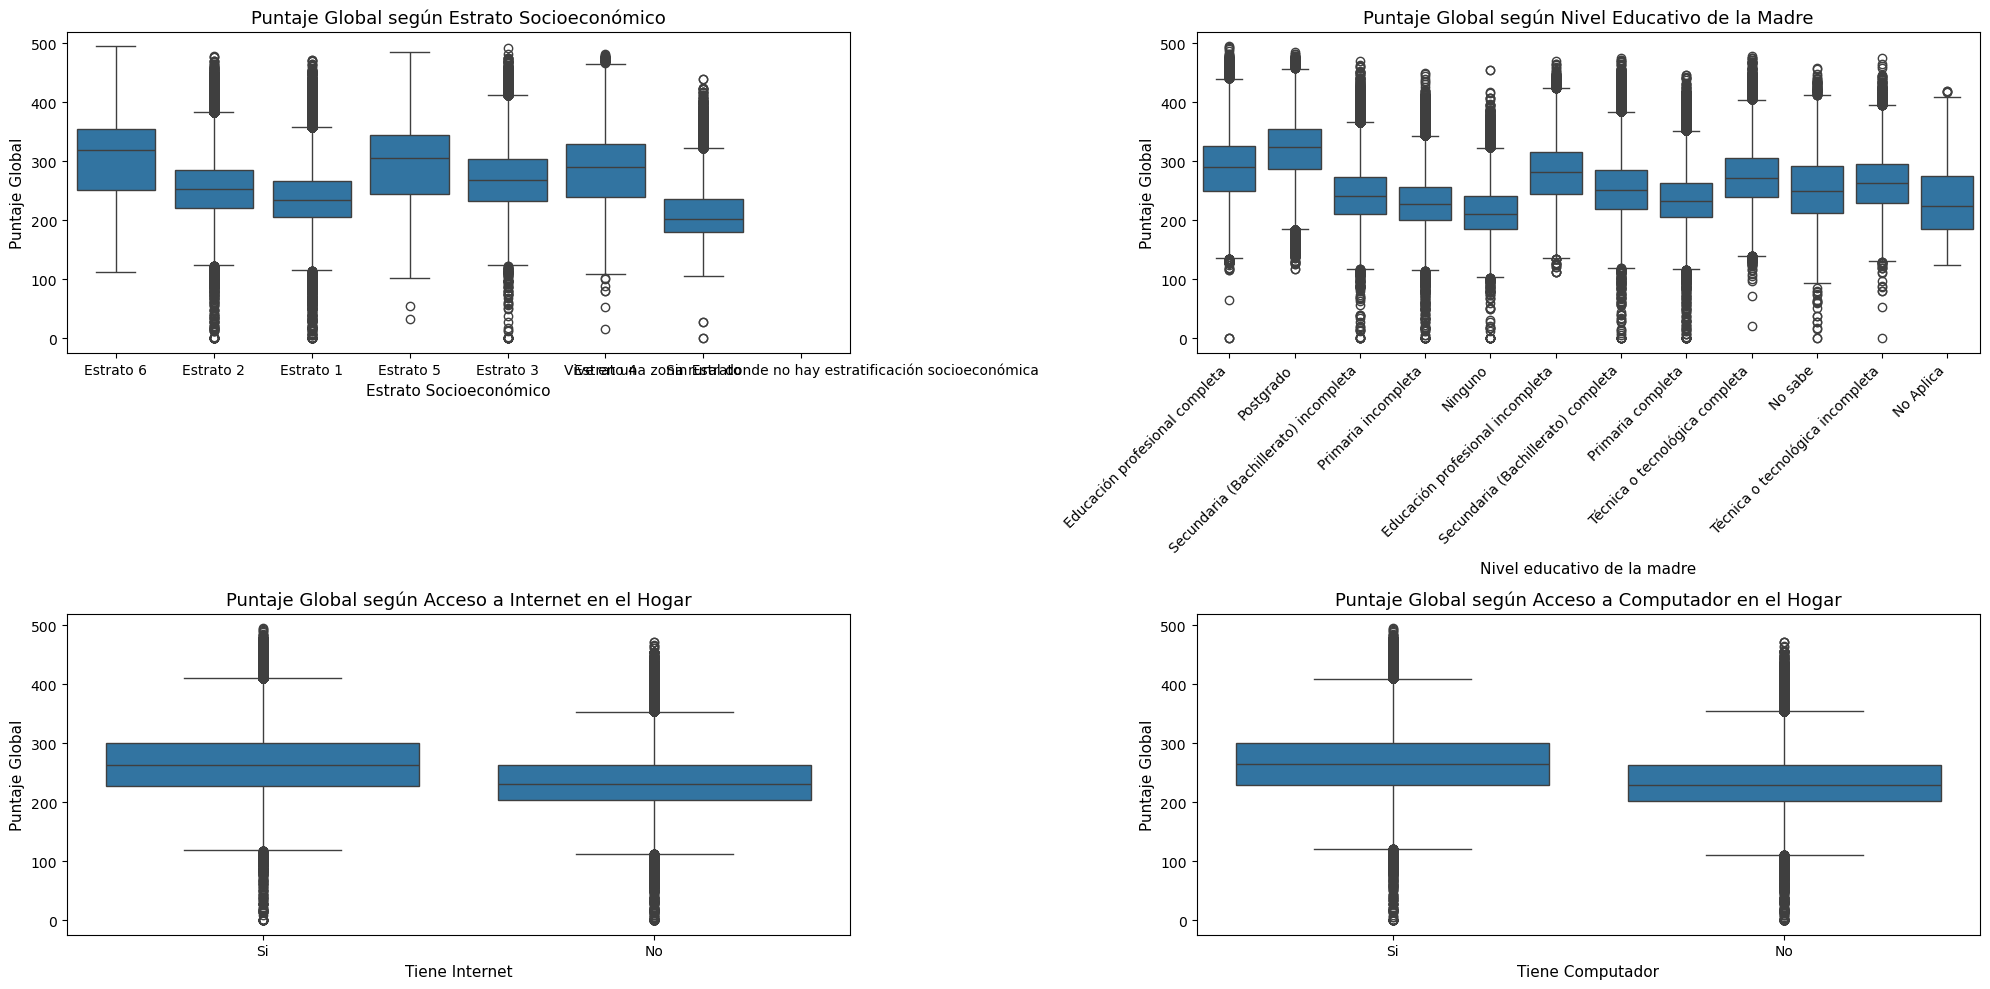

In [30]:
plt.figure(figsize=(20, 10))

# Estrato socioeconómico
plt.subplot(2, 2, 1)
sns.boxplot(x='fami_estratovivienda', y='punt_global', data=saber11_df)
plt.title('Puntaje Global según Estrato Socioeconómico', fontsize=13)
plt.xlabel('Estrato Socioeconómico', fontsize=11)
plt.ylabel('Puntaje Global', fontsize=11)

# Educación de la madre
plt.subplot(2, 2, 2)
sns.boxplot(x='fami_educacionmadre', y='punt_global', data=saber11_df)
plt.title('Puntaje Global según Nivel Educativo de la Madre', fontsize=13)
plt.xlabel('Nivel educativo de la madre', fontsize=11)
plt.ylabel('Puntaje Global', fontsize=11)
plt.xticks(rotation=45, ha='right')

# Acceso a Internet
plt.subplot(2, 2, 3)
sns.boxplot(x='fami_tieneinternet', y='punt_global', data=saber11_df)
plt.title('Puntaje Global según Acceso a Internet en el Hogar', fontsize=13)
plt.xlabel('Tiene Internet', fontsize=11)
plt.ylabel('Puntaje Global', fontsize=11)

# Acceso a Computador
plt.subplot(2, 2, 4)
sns.boxplot(x='fami_tienecomputador', y='punt_global', data=saber11_df)
plt.title('Puntaje Global según Acceso a Computador en el Hogar', fontsize=13)
plt.xlabel('Tiene Computador', fontsize=11)
plt.ylabel('Puntaje Global', fontsize=11)

plt.tight_layout()
plt.show()


En la primera gráfica se observa una relación positiva entre el estrato socioeconómico y el puntaje global. Los estudiantes de estratos 5 y 6 presentan medianas de puntaje más altas, mientras que los de estrato 1 concentran valores más bajos. Esto sugiere que las condiciones socioeconómicas del hogar tienen una incidencia directa en el desempeño académico, posiblemente asociada al acceso a recursos educativos y entornos de aprendizaje más favorables.

En cuanto al nivel educativo de la madre, se evidencia una tendencia similar a mayor nivel de educación, mayor puntaje global. 
Los hijos de madres con educación técnica, profesional o posgrado tienden a ubicarse en rangos de puntaje más altos, mientras que los de madres con educación básica o primaria muestran distribuciones más bajas. Este patrón refuerza la idea de que el capital educativo familiar influye en las oportunidades de aprendizaje de los estudiantes.

Respecto al acceso a internet y a computador, ambos muestran diferencias claras en la mediana de puntajes. Los estudiantes que cuentan con estos recursos en casa tienden a obtener puntajes globales superiores, lo que destaca la importancia del acceso a herramientas tecnológicas como apoyo en los procesos de estudio y preparación.


### corelacion entre variables 

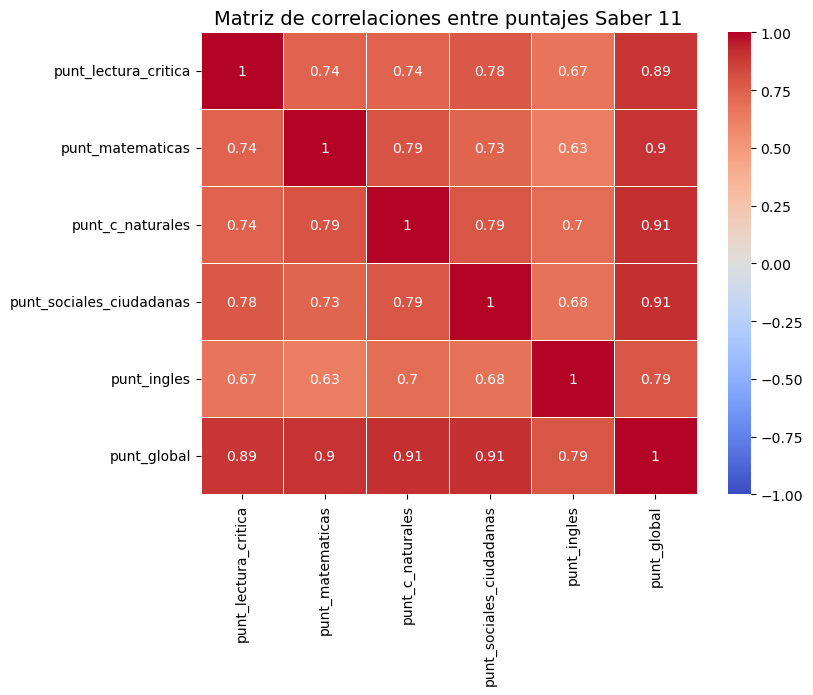

In [32]:

cols_interes = [
    'punt_lectura_critica',
    'punt_matematicas',
    'punt_c_naturales',
    'punt_sociales_ciudadanas',
    'punt_ingles',
    'punt_global'
]

correlaciones = saber11_df[cols_interes].corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Matriz de correlaciones entre puntajes Saber 11', fontsize=14)
plt.show()


Las áreas evaluadas presentan correlaciones positivas y fuertes, lo que indica que el desempeño de los estudiantes tiende a ser coherente entre las distintas competencias.
Las relaciones más altas se observan entre Matemáticas, Ciencias Naturales y Sociales, que muestran patrones de rendimiento similares y una influencia directa sobre el puntaje global.

Por su parte, Inglés mantiene una correlación positiva pero algo menor, lo que sugiere que su desempeño puede depender de factores externos como el acceso a recursos o la exposición al idioma.

En conjunto, los resultados reflejan que un buen desempeño en una competencia suele ir acompañado de buenos resultados en las demás, evidenciando una base académica general consistente.